**Import all the required dependencies**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset into a pandas dataframe
data = pd.read_csv("/content/chennai_dynamic_pricing_data.csv")

In [4]:
# Verifying the column names
expected_columns = ["Route", "Bus_Type", "Time_of_Day", "Day_of_Week", "Weather_Condition",
                    "Passenger_Count", "Base_Fare", "Dynamic_Fare"]
print("Columns in dataset:", list(data.columns))
missing_cols = [col for col in expected_columns if col not in data.columns]
if missing_cols:
    print(f"Error: Missing columns {missing_cols}. Please check your dataset.")
    exit()

Columns in dataset: ['Route', 'Bus_Type', 'Time_of_Day', 'Day_of_Week', 'Weather_Condition', 'Passenger_Count', 'Base_Fare', 'Dynamic_Fare']


In [5]:
# Feature engineering (before encoding)
data["Peak_Hour"] = data["Time_of_Day"].apply(lambda x: 1 if x in ["Morning", "Evening"] else 0)
data["Weekend"] = data["Day_of_Week"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)

In [6]:
# Preprocessing
# Encode categorical features
categorical_cols = ["Route", "Bus_Type", "Time_of_Day", "Day_of_Week", "Weather_Condition"]
data = pd.get_dummies(data, columns=categorical_cols)

In [7]:
# Splitting the Features and target
X = data.drop(columns=["Dynamic_Fare"])
y = data["Dynamic_Fare"]

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scaling the numerical features
scaler = StandardScaler()
num_cols = ["Passenger_Count", "Base_Fare"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [13]:
# Training the XGBoost model
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
# Predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [19]:
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9998
MAE: 0.2027
MAPE: 0.0069
RMSE: 0.0696


In [23]:
# Visualizations
plt.figure(figsize=(30, 30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

Text(0, 0.5, 'Predicted Fare')

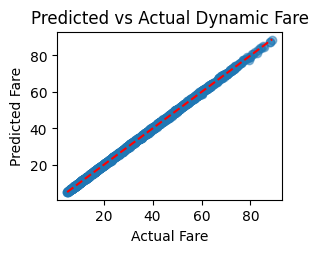

In [24]:
# 1. Predicted vs Actual Scatter
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Predicted vs Actual Dynamic Fare")
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")

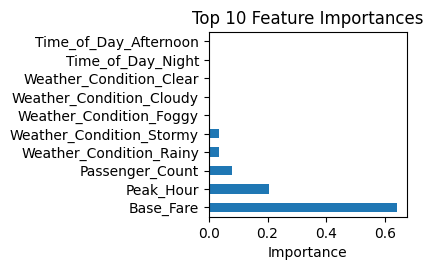

In [27]:
# 4. Feature Importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.subplot(2, 2, 4)
feat_importance.plot(kind="barh")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()

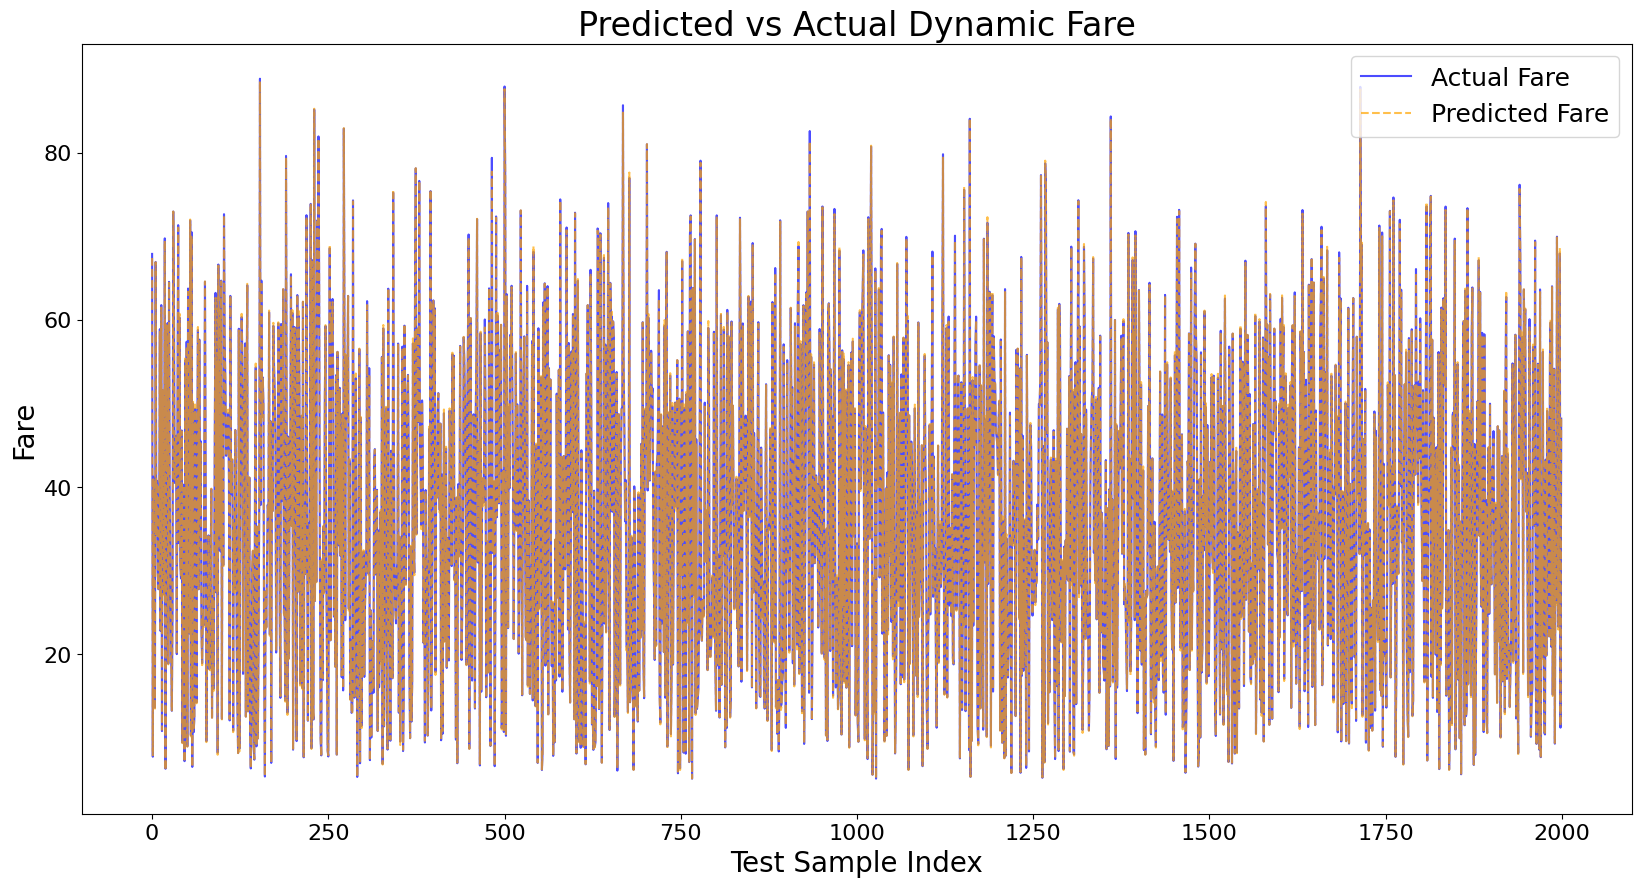

In [32]:
# 1. Predicted vs Actual Scatter (Other way of plot)
plt.figure(figsize=(20, 10))
plt.plot(range(len(y_test)), y_test, label="Actual Fare", color="blue", alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label="Predicted Fare", color="orange", linestyle="--", alpha=0.7)
plt.title("Predicted vs Actual Dynamic Fare", fontsize=24)
plt.xlabel("Test Sample Index", fontsize=20)
plt.ylabel("Fare", fontsize=20)
plt.legend(fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.show()